The dataset used here is the PIMA Indian Diabetes dataset from Kaggle.
https://www.kaggle.com/uciml/pima-indians-diabetes-database

The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and can be used to predict whether a patient has diabetes based on certain diagnostic factors. In particular, all patients here are females at least 21 years old of Pima Indian heritage


Python 3.6.9 is used for the analysis

In [15]:
#The first step involves the loading of libraries
#Standard
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [16]:
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [17]:
#Importing the Dataset
dataset=pd.read_csv(r'/home/varun/Desktop/diabetes.csv')

In [18]:
display(dataset.head(),dataset.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


All the attrributes in the dataset are Numerical except the Outcome. The data description shows zero values for Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin and BMI. A zero for pregnancies indicates no pregnancies but for the rest of the columns it doesn't seem to be correct and hence data imputation is needed.

In [19]:
#NO null values, therefore it is a clean dataste
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
dataset.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

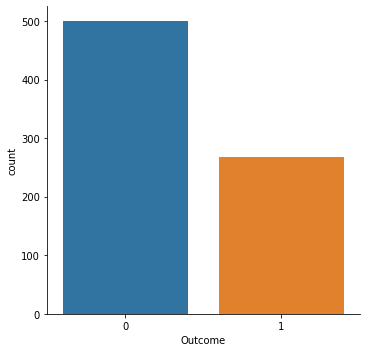

In [21]:
sns.catplot(x="Outcome",data= dataset, kind="count")

The barplot shows the number of Diabetes and non diabetets patients as 268 and 500 respectively

<AxesSubplot:>

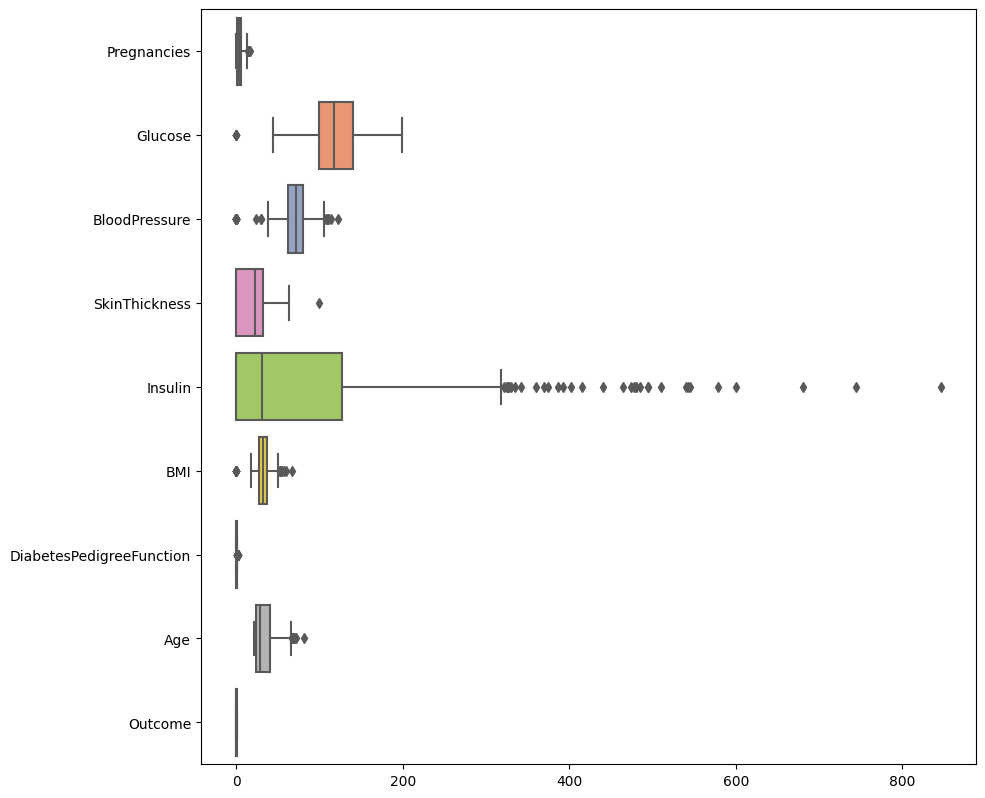

In [22]:
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')

sns.boxplot(data=dataset, orient="h", palette="Set2")

From the boxplot description,Insulin is the parameter with most number of Outliers.

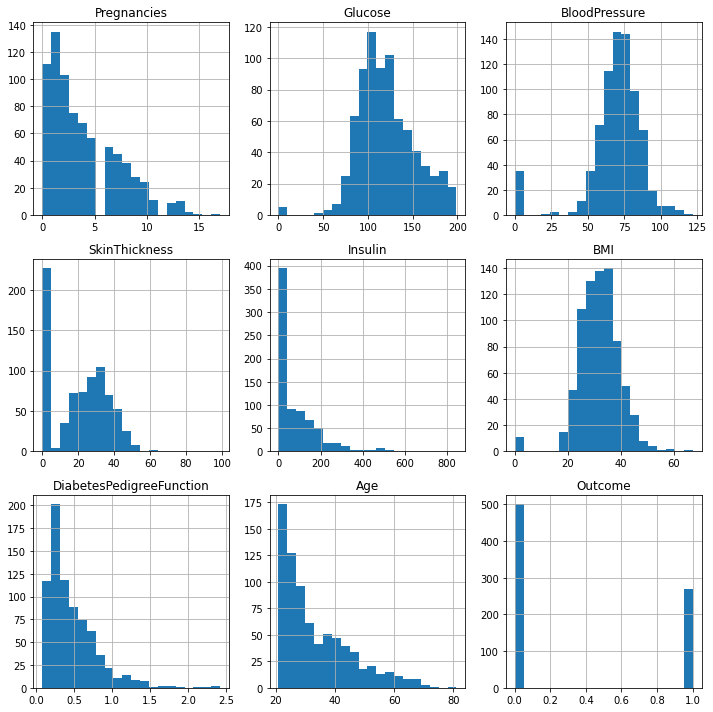

In [23]:
# Histogram plot of data

col = list(dataset.columns)
dataset[col].hist(stacked=True, bins=20, figsize=(10,10), layout=(3,3))
plt.tight_layout()

The above histogram plots give a view of the  distribution of the dataset parameters.
At first glance, most of them appear to be positively skewed, with Glucose and BloodPressure with the closest distribution to a normal distribution. We will be doing hypothesis testing to check for the normality. Outcome is a bimodal distribution which is to be expected.
An individual Analysis of each of the parameters is done.

In [24]:
#Pregnancies
dataset["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

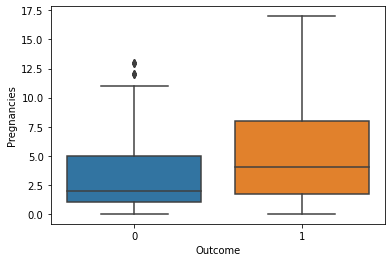

In [12]:
ax = sns.boxplot(x= "Outcome", y= "Pregnancies", data=dataset)

The number of Pregnancies in the women renage from 0 to 17. However, diabetic women have more pregnancies than non diabetic.

In [13]:
dataset["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

The Glucose data seems to be nearly normalised. To confirm if the Gluocse is normally distributed, hypothesis testing is done and the normaltest function in scipy.stats is used to perform it. The minimun value of Glucose is however zero which is biologically not possible and therefore data imputation is needed. 

In [14]:
alpha = 0.05 ##Assuming a 5% significance level for all the tests

def hypothesis_result(p_value):
    p_value = round(p_value,4)
    if p_value < alpha:
        print ("As p-value is ",p_value,", which is lower than the significance level, we reject the null hypothesis.")
    else:
        print ("As p-value is ",p_value,", which is higher than the significance level, we do not reject the null hypothesis.")

In [165]:
s2, p2 = stats.normaltest(dataset['Glucose'])

hypothesis_result(p2)

As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.


Therefore Glucose does not have any normal distribution

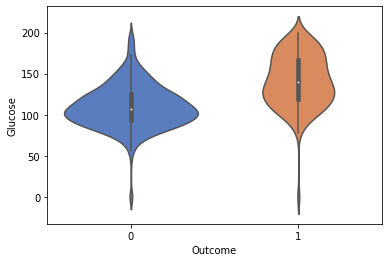

In [117]:
#Glucose visualization using violin plot
ax = sns.violinplot(x="Outcome", y="Glucose", data=dataset, palette="muted", split=True, scale="count")

The Glucose data for non diabetics follow nearly normal distribution. Vertical shift between the two outcomes shows that the diabetics have a higher level of Glucose. The zero values are present for this variable as well and imputed using median.

In [118]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

In [121]:
dataset["Glucose"].isnull().sum()

0

In [126]:
dataset["BloodPressure"].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [127]:
dataset["BloodPressure"].median()

72.0

The distribution looks approximately normal(mean= 69 and median= 72). To check for the normality Shapiro-Wilk test is used (another method for checking normalization) with null hypothesis(Ho) that the Blood Pressure is normally distributed. Also a minimum value of 0 is not possible for Blood Pressure, imputation required.

In [128]:
from scipy.stats import shapiro
stat, p = shapiro(dataset['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.819, p=0.000


Since the p-value is less than the 5% Level of Significance (LOS) the null hypothesis (Ho) is rejected. Therefore, the variable does not follow a normal distribution.

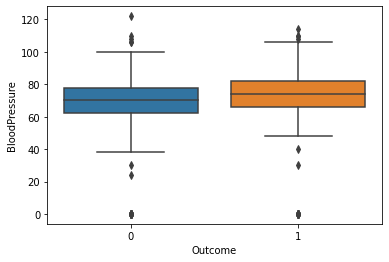

In [130]:
#Classifying the Blood Pressure based on Outcome
ax = sns.boxplot(x= "Outcome", y= "BloodPressure", data=dataset)

Interpretation: Diabetics seem to have a higher blood pressure than the non-diabetics. The outliers around 0 indicates the number of zeros in the data which need to be imputed. The imputation is done with the respective medians for both the outcomes. 

In [131]:
#Replacing the zero-values for Blood Pressure
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

In [132]:
dataset["BloodPressure"].isnull().sum()

0

In [135]:
dataset["SkinThickness"].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

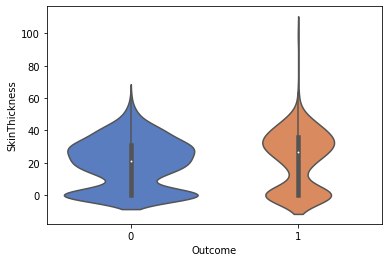

In [136]:
ax = sns.violinplot(x="Outcome", y="SkinThickness", data=dataset, palette="muted", split=True, scale="count")

The Skin thickness for diabetics is much more. The data again contains zeros and are imputed by median.

In [137]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

In [138]:
dataset["Insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [139]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.median(df1['BMI']))
df2 = df2.replace({'Insulin':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

The Insulin data is positively skewed and the zero values are replaced by median. The box plot after imputation shows a large number of outliers. The Insulin values are higher for diabetics which is an expected result.

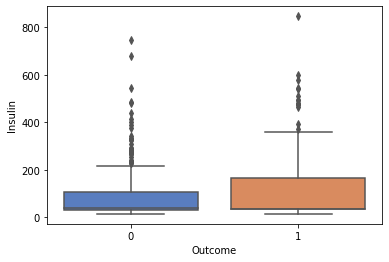

In [140]:
ax = sns.boxplot(x="Outcome", y="Insulin", data=dataset,palette="muted")

In [143]:
dataset["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

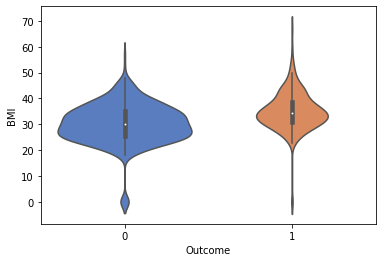

In [147]:
ax = sns.violinplot(x="Outcome", y="BMI", data=dataset, palette="muted", split=True, scale="count")

The violinplot demonstrates:<br/>
1.The presence of zero values for both the outcomes though the number seems comparatively higher for the non diabetic individuals i.e; outcome=0. <br/>
2.The BMI data for outcome=1 follows normal distribution while outcome =0 doesn't.<br/>
3.The BMI is higher for the diabetic patients than non diabetic

In [148]:
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

In [149]:
dataset["DiabetesPedigreeFunction"].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

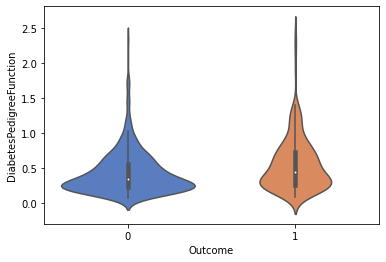

In [150]:
ax = sns.violinplot(x="Outcome", y="DiabetesPedigreeFunction", data=dataset, palette="muted", split=True, scale="count")

The Histogram shows that the Diabetes Pedigree Function is a positively skewed variable with no zeros and diabetics have a higher PedigreeFunction than non diabetics.

In [151]:
dataset["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

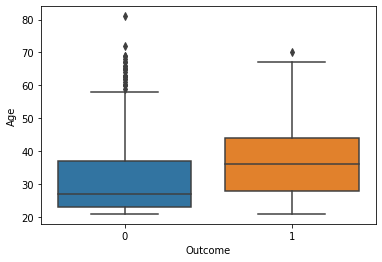

In [26]:
ax = sns.boxplot(x= "Outcome", y= "Age", data=dataset)

Age is again a positively skewed parameter with no zeros. Most of the diabetics are in the age between 30 and 45 while the highest age for diabetics goes upto 70 years

In [153]:
correlate_data= dataset.corr()

In [154]:
correlate_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209155,0.108577,-0.053257,0.023887,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.224684,0.227542,0.362238,0.236225,0.138353,0.268910,0.495990
BloodPressure,0.209155,0.224684,1.000000,0.212910,-0.026357,0.285945,-0.001336,0.325306,0.173316
SkinThickness,0.108577,0.227542,0.212910,1.000000,0.074485,0.544527,0.083466,0.158947,0.287828
Insulin,-0.053257,0.362238,-0.026357,0.074485,1.000000,0.193667,0.179090,-0.012926,0.158617
BMI,0.023887,0.236225,0.285945,0.544527,0.193667,1.000000,0.152779,0.027873,0.315606
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001336,0.083466,0.179090,0.152779,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325306,0.158947,-0.012926,0.027873,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.173316,0.287828,0.158617,0.315606,0.173844,0.238356,1.000000


In [69]:
print(np.where(correlate_data > 0.5))

(array([0, 0, 1, 2, 3, 3, 4, 5, 5, 6, 7, 7, 8]), array([0, 7, 1, 2, 3, 5, 4, 3, 5, 6, 0, 7, 8]))


The correlation values shows the Glucose is the most important feature to affect the Outcome.The parameter with the highest positive correlation to each other is (BMI,SkinThickness) and (Pregnancies, Age) but it still doesn't constitute a very strong collinearity (usually >0.75). Further feature selection is done using the chi-squared statistical test

In [58]:
X = dataset.iloc[:,0:8] 
y = dataset.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(8,'Score'))

                   Features        Score
4                   Insulin  2244.961975
1                   Glucose  1439.168619
7                       Age   181.303689
3             SkinThickness   169.693465
5                       BMI   111.602181
0               Pregnancies   111.519691
2             BloodPressure    46.638881
6  DiabetesPedigreeFunction     5.392682


Thus BloodPressure and Diabetes Pedigree function are the two columns having least contribution in deciding the outcome. A correlation matrix is built to further confirm the aforementioned analysis.

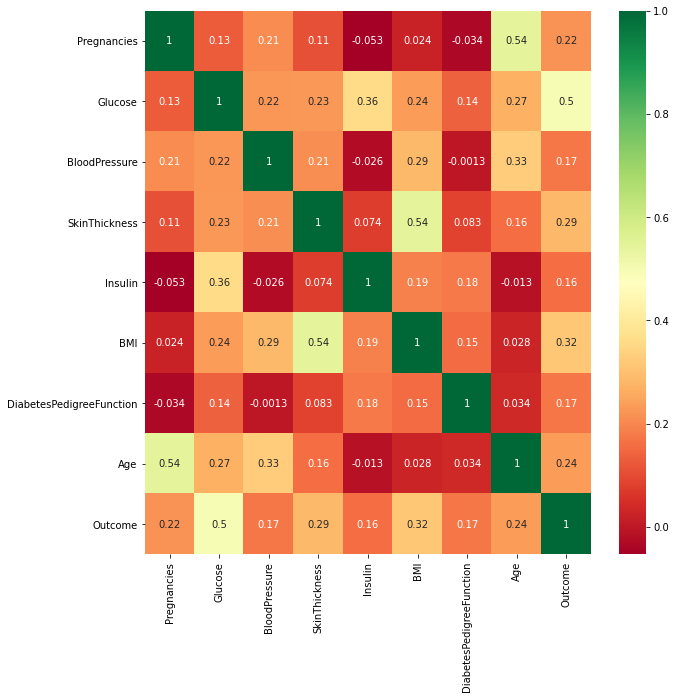

In [60]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The results from the correlation matrix and chi squared test doesn't seem to be in consensus as Insulin doesn't look like strongly correalted to the outcome. To further confirm the result  Pearson correlation test using stats.pearsonr is done.



In [175]:
corr, _ = stats.pearsonr(dataset["Insulin"], dataset["Outcome"])
print("Pearsons correlation between Insulin and Target variable is: %.3f" % corr)


Pearsons correlation between Insulin and Target variable is: 0.159


The Pearson correlation test further iterates a weak correlation between outcome and Insulin. Further we check for the correlation coefficient between Glucose and outcome.

In [176]:
corr, _ = stats.pearsonr(dataset["Glucose"], dataset["Outcome"])
print("Pearsons correlation between Glucose and Target variable is: %.3f" % corr)


Pearsons correlation between Glucose and Target variable is: 0.496


In [26]:
df= dataset.loc[dataset["Outcome"] == 1]

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [28]:
df["Glucose"].describe()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

Text(0.5, 1.0, 'Glucose variation in diabetic patients')

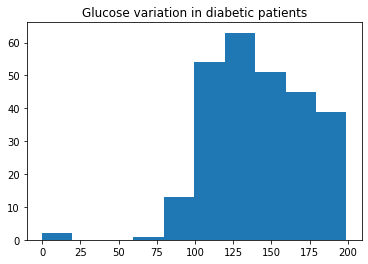

In [29]:
plt.hist(df["Glucose"])
plt.title("Glucose variation in diabetic patients")

The histogram shows that once the Glucose level becomes more than 100 there is a steep increase in the number of diabetics.

**Conclusion**

Since some variables like BloodPressure, Glucose, SkinThickness, BMI, and Insulin can never be zero, we have imputed the missing values - which are replaced by the outcome based median or mean values. Also, there is a strong positive relation between glucose and diabetes and is the most important factor in determining the onset of diabetes followed by BMI and Age.
